In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

SAMPLE_FILE='../taaco/sampled_files.json'

In [3]:
import nltk
import string

from nltk.stem.wordnet import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, ngrams
from nltk.corpus import stopwords, wordnet

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stopwords_english = stopwords.words('english')

regular_punct = list(string.punctuation)
extra_punct= ['।', '“', '”', '৷', '‘', '’']
all_punct = list(set(regular_punct + extra_punct))
lem = WordNetLemmatizer()

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def remove_punctuation(text, punct_list):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, '')
    return text.strip()

def extract_sentences(text):
    text = text.lower()
    sentences = sent_tokenize(text, language='english')
    return sentences

def extract_words(sentences):
    tokens_list = []
    for text in sentences:
        text = remove_punctuation(text, all_punct)
        tokens = word_tokenize(text)
        # tokens = [x for x in tokens if not any(c.isdigit() for c in x)]
        tokens = [lem.lemmatize(x) for x in tokens if not any(c.isdigit() and c not in stopwords_english for c in x)]
        tokens_list.append(tokens)
    return tokens_list

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sudipto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sudipto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sudipto/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
def preprocess_document(document):
    # lowercase all words and remove trailing whitespaces
    document = document.lower().strip()
    
    # get list of sentences which are non-empty
    sentences = [sent for sent in sent_tokenize(document) if len(sent) > 0]

    # remove punctuations from each sentence
    for i in range(len(sentences)):
        sentences[i] = remove_punctuation(sentences[i], all_punct)
    
    # get list of sentences which are lists of words
    document = []
    for sent in sentences:
        words = word_tokenize(sent)
        document.append([lem.lemmatize(word, get_wordnet_pos(word)) for word in words if word not in stopwords_english and word.isalpha()])
        # document.append([word for word in words if word not in stopwords_english])
        
    return document

In [35]:

def build_graph(doc):
    # preprocess document for standardization
    pdoc = preprocess_document(doc)
    
    # get graph nodes
    nodes = get_entities(pdoc)
    
    # get graph edges
    edges = get_relations(pdoc)
    
    # create graph structure with NetworkX
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    G.remove_edges_from(nx.selfloop_edges(G))
    return G


def build_digraph(doc):
    # preprocess document for standardization
    pdoc = preprocess_document(doc)
    
    # get graph nodes
    nodes = get_entities(pdoc)
    
    # get graph edges
    edges = get_relations(pdoc)
    
    # create graph structure with NetworkX
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    G.remove_edges_from(nx.selfloop_edges(G))
    return G

In [36]:
def get_entities(document):
    # in our case, entities are all unique words
    unique_words = []
    for sent in document:
        for word in sent:
            if word not in unique_words:
                unique_words.append(word)
    return unique_words

In [37]:

from itertools import combinations

def get_relations(document):
    # in our case, relations are links
    links = []
    # add pairs of all words in a sentence
    for sent in document:
        # add all possible combinations of words in sentence
        links.extend(list(combinations(sent, 2)))
    return links

In [38]:
def plot_graph(G, tag, title=None):
    # set figure size
    plt.figure(figsize=(10,10))
    
    # define position of nodes in figure
    pos = nx.nx_agraph.graphviz_layout(G)
    
    # draw nodes and edges
    nx.draw(G, pos=pos, with_labels=True, node_size=30, font_size=6, width=.1, alpha=.8)
    
    # get edge labels (if any)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    
    # draw edge labels (if any)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, alpha=.8)
    
    # plot the title (if any)
    plt.title(str(title) + '-' + tag)
    
    plt.show()
    return

In [39]:
import os

DATA_DIR='../taaco/inputs'

def get_file_name(id, tag):
    return os.path.join(DATA_DIR, tag, str(id) + '.txt')

### Undirected Graph

Nodes: unique content words
Links: co-occurrence of words within a sentence

Facing the development of the times and technological progress needs new methods and technologies to enrich semantic analysis of scientific & technical literature. Term is the linguistic expression of the concepts in professional knowledge, which is accumulated through incremental exploration and research in specific fields. In the study of semantic analysis, term recognition is an important research subject. This research intended to apply deep neural network in term recognition. And the paper also introduced specific methods of semantic analysis based on the result of Chinese term recognition and implementation using specific scientific & technical literature. It gave an overview of theories and technologies related to the method and used the real and effective corpus for experiments.
Network Properties:
nodes, edges			52, 390
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.294118
clustering coefficient		0.895856
min/max/avg degree		7, 34, 15.000000

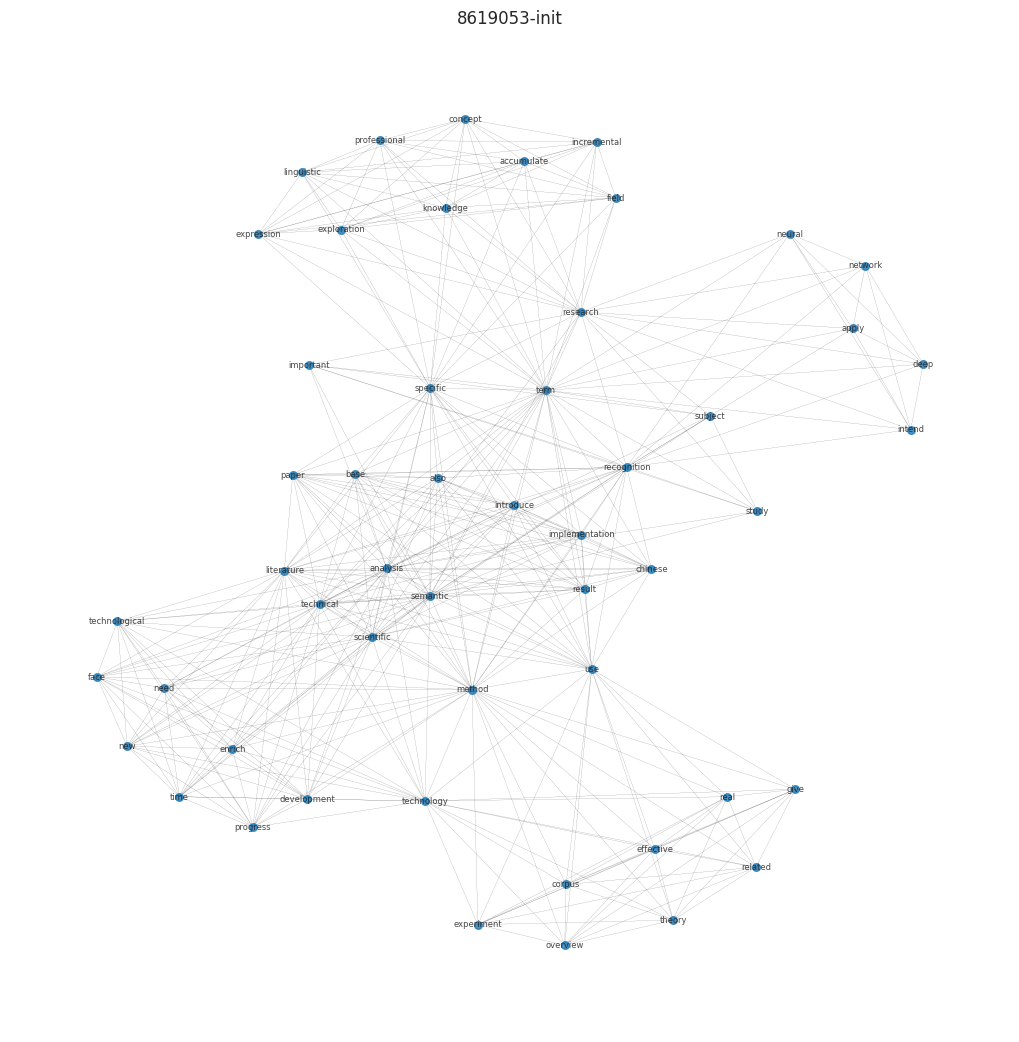

This paper delves into the realm of Chinese term recognition and semantic analysis in scientific and technical literature. The authors explore various techniques for feature extraction, including the application of deep learning and neural networks. Additionally, semantics are a critical component of this analysis, with data models and thesauri being utilized to build accurate representations of Chinese terms. The paper emphasizes the significance of nonhomogeneous media in creating effective models, and provides insights into the challenges that emerge when dealing with this complexity. Overall, this research represents a significant step towards the development of highly accurate and efficient methods for Chinese term recognition and semantic analysis in scientific and technical literature.
Network Properties:
nodes, edges			56, 440
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.285714
clustering coefficient		0.936375
min/max/avg degree		10, 31, 15

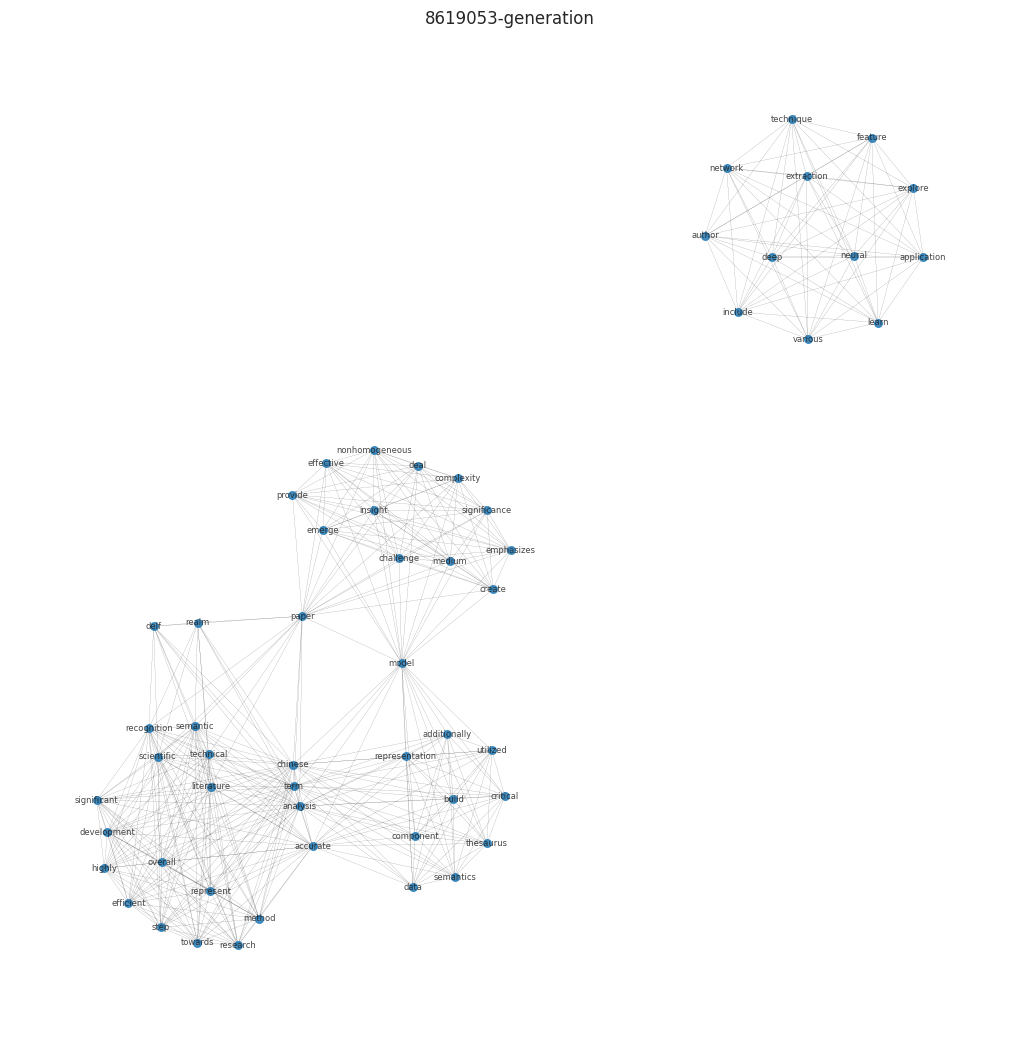

In [40]:
import json
import random
import networkit as nk

TAGS = ['init', 'generation']

with open(SAMPLE_FILE, 'r') as f:
    files = json.load(f)['ids']
    
    # read the first file in the list
    for file in files[2:3]:
        for tag in TAGS:
            with open(get_file_name(file, tag), 'r') as f:
                t = f.read()
                print(t)
                g = build_graph(t)
                _g = nk.nxadapter.nx2nk(g)
                nk.overview(_g)
                plot_graph(g, tag, title=files[0])

Directed Graph

In this paper, we investigate the output consensus tracking problem for a class of high-order nonlinear systems subjected to unknown parameters and uncertain external disturbances. A novel backstepping based distributed adaptive control scheme is presented under the directed communication status. For the subsystems without direct access to time-varying desired trajectory, local estimators are introduced and the corresponding adaptive laws are designed in a totally distributed fashion. With the presented scheme, the assumption on linearly parameterized reference signal and the information exchange operation of subsystem inputs in the existing results are no longer needed. It is shown that all the closed-loop signals are globally uniformly bounded and desired output consensus tracking can be achieved.
Network Properties:
nodes, edges			60, 483
directed?			True
weighted?			False
isolated nodes			5
self-loops			0
density				0.136441
min/max/avg degree		0, 21, 8.050000
degree assortativity	

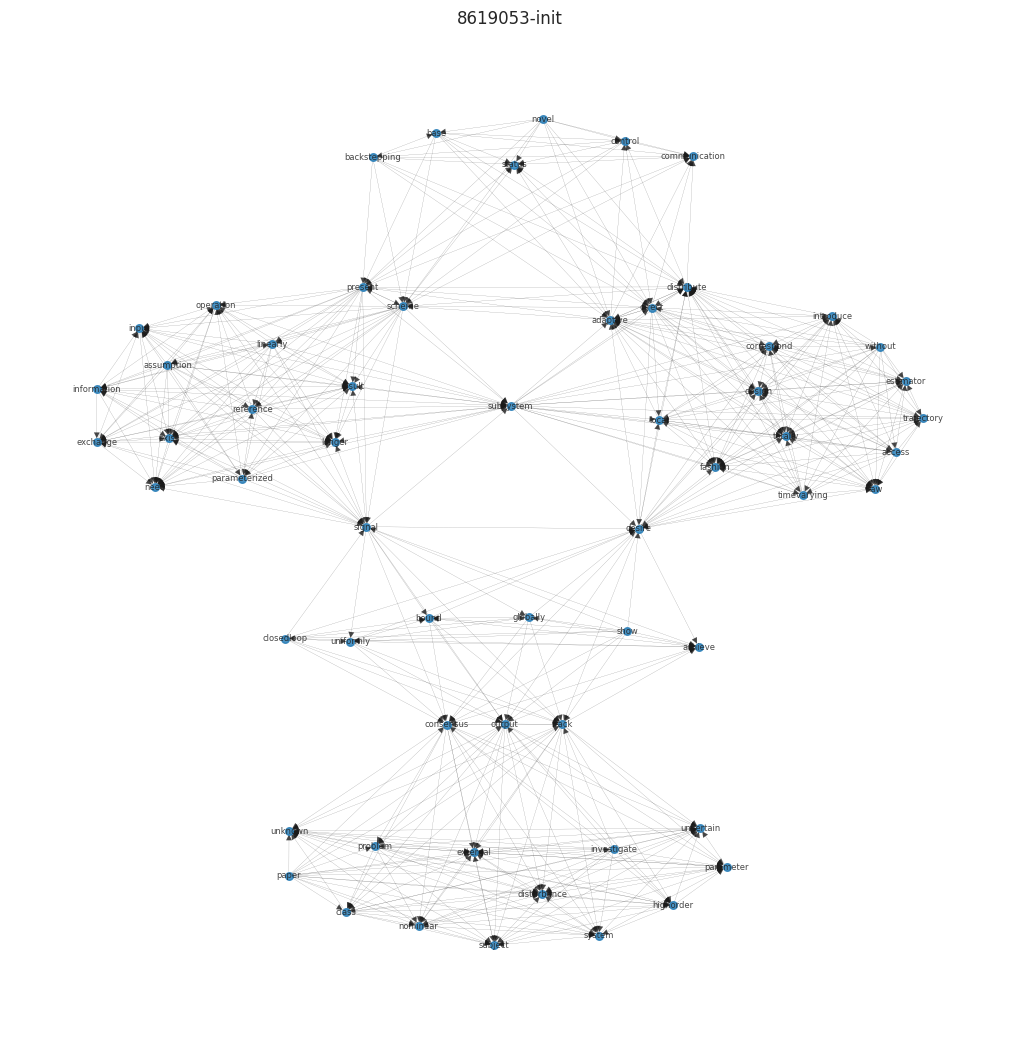

This paper presents a distributed adaptive consensus tracking control method for uncertain high-order nonlinear systems under directed graph condition. The proposed approach utilizes the backstepping technique, topology information, and Lyapunov methods to achieve consensus tracking control of multiple agents. The trajectory of the system is considered in the design of the controller to ensure that agents can converge to a common trajectory while following their own optimal paths. The uncertain parameters of the system are estimated online by adaptive control laws, which guarantee the convergence of the estimation errors. The topology of the control network is assumed to be partially known and the proposed approach is robust to changes in the communication topology. The efficacy of the proposed approach is demonstrated through simulations on a network of agents.
Network Properties:
nodes, edges			54, 424
directed?			True
weighted?			False
isolated nodes			3
self-loops			0
density				0.

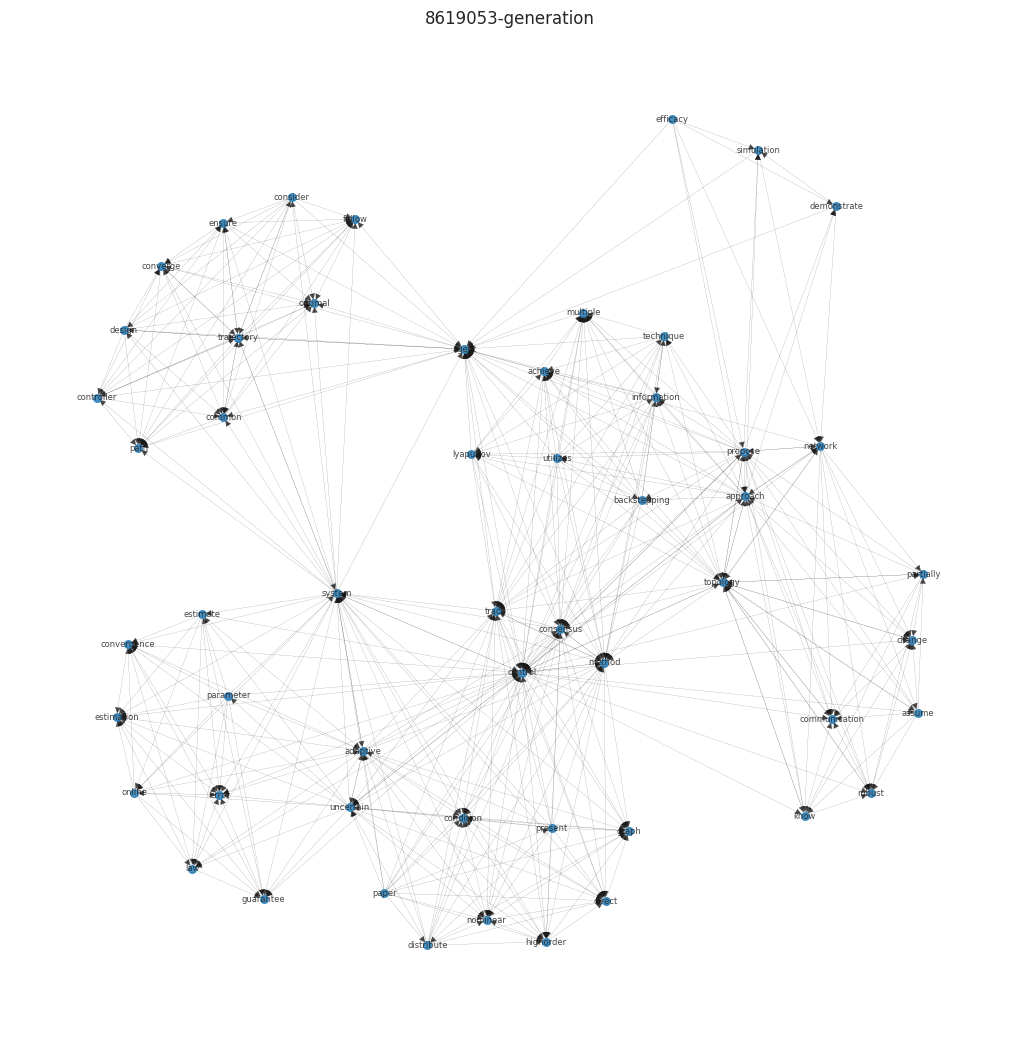

In [41]:
with open(SAMPLE_FILE, 'r') as f:
    files = json.load(f)['ids']
    
    # read the first file in the list
    for file in files[:1]:
        for tag in TAGS:
            with open(get_file_name(file, tag), 'r') as f:
                t = f.read()
                print(t)
                g = build_digraph(t)
                _g = nk.nxadapter.nx2nk(g)
                nk.overview(_g)
                plot_graph(g, tag, title=files[0])

### Adding Edge Weight based on the co-occurrence frequency of two words in a sentence

In [42]:
def get_weighted_edges(document):
    # get number of times a pair of words co-occur in a sentence
    weighted_edges = {}
    for sent in document:
        for edge in combinations(sent, 2):
            if edge in weighted_edges:
                weighted_edges[edge] += 1
            else:
                weighted_edges[edge] = 1
                
    # convert to NetworkX standard form each edge connecting nodes u and v = [u, v, weight]
    weighted_edges_format = []
    for pair, weight in weighted_edges.items():
        w1, w2 = pair
        weighted_edges_format.append([w1, w2, weight])
        
    return weighted_edges_format

In [25]:
def build_weighted_digraph(doc):
    # preprocess document for standardization
    pdoc = preprocess_document(doc)
    
    # get graph nodes
    nodes = get_entities(pdoc)
    
    # get weighted edges
    weighted_edges = get_weighted_edges(pdoc)
    
    # create graph structure with NetworkX
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(weighted_edges)
    G.remove_edges_from(nx.selfloop_edges(G))
    return G

8619053
init
In this paper, we investigate the output consensus tracking problem for a class of high-order nonlinear systems subjected to unknown parameters and uncertain external disturbances. A novel backstepping based distributed adaptive control scheme is presented under the directed communication status. For the subsystems without direct access to time-varying desired trajectory, local estimators are introduced and the corresponding adaptive laws are designed in a totally distributed fashion. With the presented scheme, the assumption on linearly parameterized reference signal and the information exchange operation of subsystem inputs in the existing results are no longer needed. It is shown that all the closed-loop signals are globally uniformly bounded and desired output consensus tracking can be achieved.


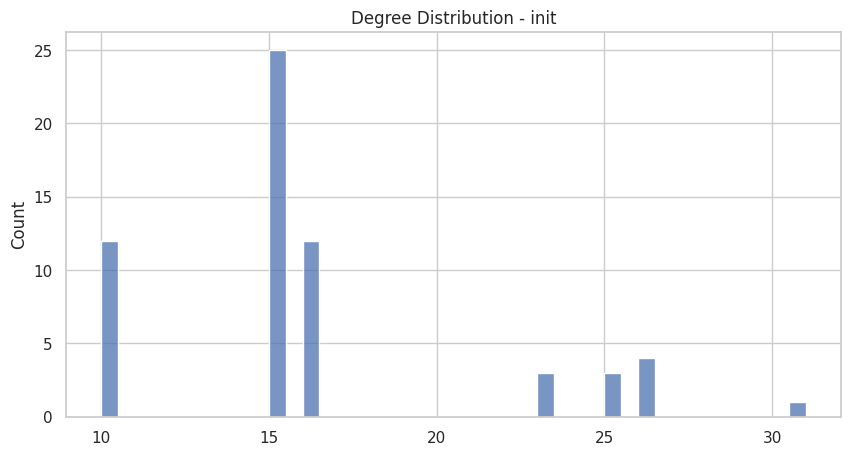

Network Properties:
nodes, edges			60, 483
directed?			True
weighted?			True
isolated nodes			5
self-loops			0
density				0.136441
min/max/avg degree		0, 21, 8.050000
degree assortativity		0.168003
number of connected components	31
size of largest component	30 (50.00 %)


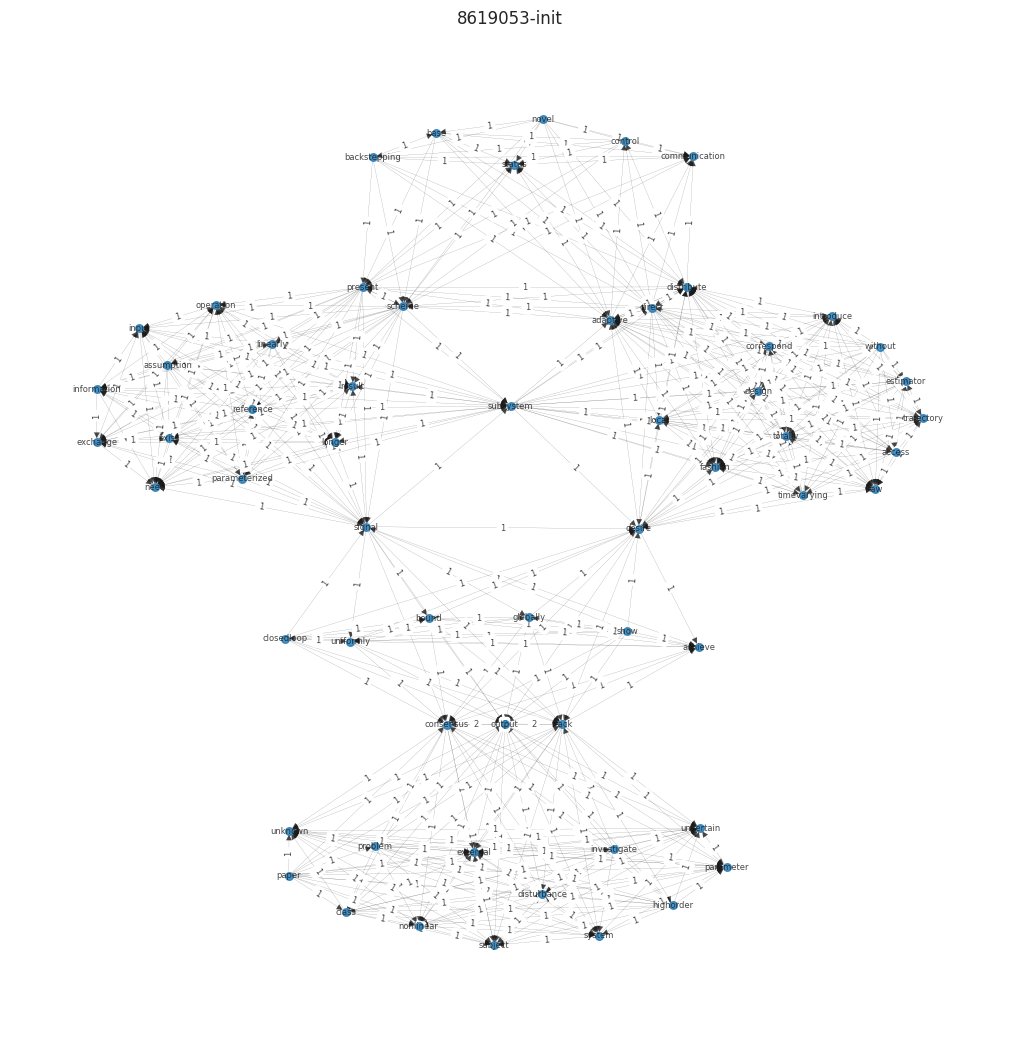

generation
This paper presents a distributed adaptive consensus tracking control method for uncertain high-order nonlinear systems under directed graph condition. The proposed approach utilizes the backstepping technique, topology information, and Lyapunov methods to achieve consensus tracking control of multiple agents. The trajectory of the system is considered in the design of the controller to ensure that agents can converge to a common trajectory while following their own optimal paths. The uncertain parameters of the system are estimated online by adaptive control laws, which guarantee the convergence of the estimation errors. The topology of the control network is assumed to be partially known and the proposed approach is robust to changes in the communication topology. The efficacy of the proposed approach is demonstrated through simulations on a network of agents.


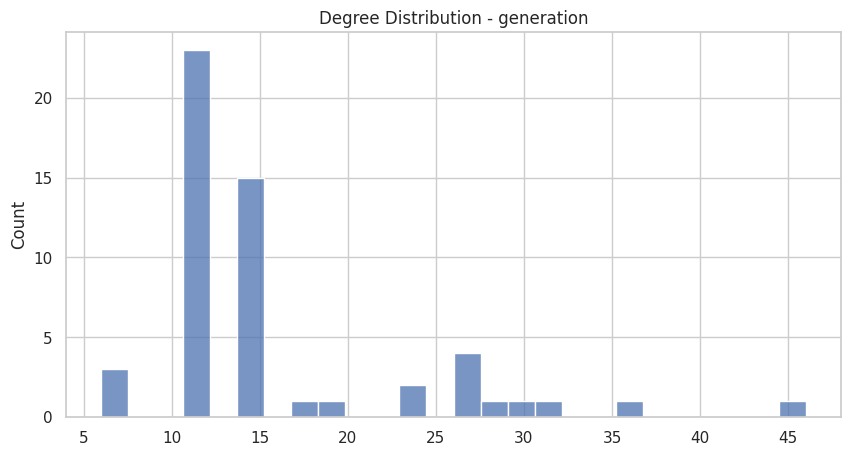

Network Properties:
nodes, edges			54, 424
directed?			True
weighted?			True
isolated nodes			3
self-loops			0
density				0.148148
min/max/avg degree		0, 25, 7.851852
degree assortativity		0.048272
number of connected components	16
size of largest component	39 (72.22 %)


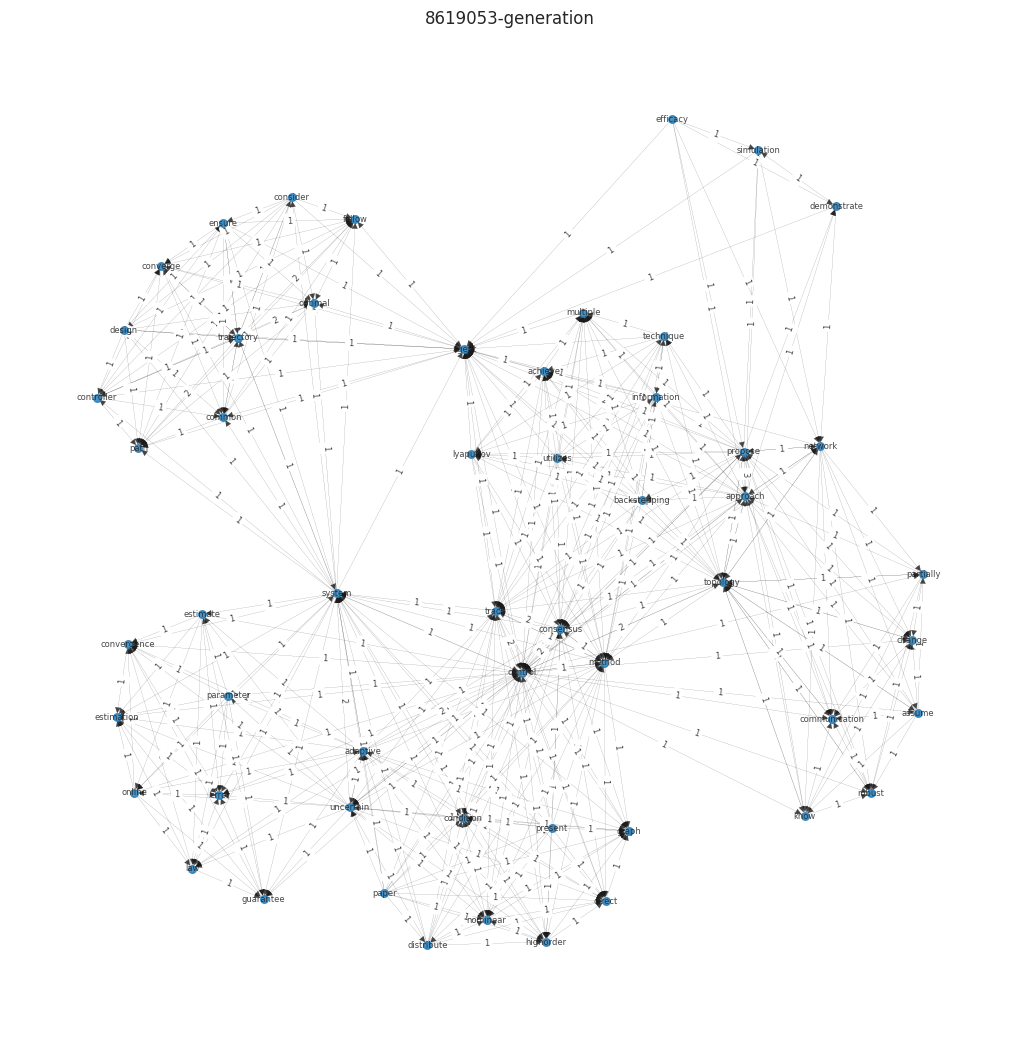

In [26]:
with open(SAMPLE_FILE, 'r') as f:
    files = json.load(f)['ids']
    
    # read the first file in the list
    for file in files[:1]:
        print(file)
        for tag in TAGS:
            print(tag)
            with open(get_file_name(file, tag), 'r') as f:
                t = f.read()
                print(t)
                g = build_weighted_digraph(t)

                plt.figure(figsize=(10,5))
                plt.title(f'Degree Distribution - {tag}')
                sns.histplot([d for n, d in g.degree()], kde=False)
                plt.show()
                
                _g = nk.nxadapter.nx2nk(g, weightAttr='weight')
                nk.overview(_g)

                plot_graph(g, tag, title=files[0])

### Network from Entire Corpus - not relevant right away

In [77]:
import string
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')

regular_punct = list(string.punctuation)
extra_punct= ['।', '“', '”', '৷', '‘', '’']
all_punct = list(set(regular_punct + extra_punct))
lem = WordNetLemmatizer()

def remove_punctuation(text, punct_list):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, '')
    return text.strip()

def extract_sentences(text):
    text = text.lower()
    sentences = sent_tokenize(text, language='english')
    return sentences

def extract_words(sentences):
    tokens_list = []
    for text in sentences:
        text = remove_punctuation(text, all_punct)
        tokens = word_tokenize(text)
        # tokens = [x for x in tokens if not any(c.isdigit() for c in x)]
        tokens = [lem.lemmatize(x) for x in tokens if not any(c.isdigit() and c not in stopwords_english for c in x)]
        tokens_list.append(tokens)
    return tokens_list

[nltk_data] Downloading package wordnet to /home/sudipto/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
def constructEdgeList(tokensList, ncount=2):
    grams = []
    for tokens in tokensList:
        stuffed_tokens = tokens + [""]*(ncount-2)
        captured_gram = ngrams(stuffed_tokens, ncount)  
        grams.extend(captured_gram)
    
    edges = []
    for gram in grams:
        for i in range(1, ncount):
            edge = tuple((gram[0], gram[i]))
            edges.append(edge)
    edges = list(filter(lambda t: '' not in t, edges))
    edges = [tuple(sorted(t)) for t in edges]
        
    bigram_freq = nltk.FreqDist(edges).most_common(len(edges))
    return bigram_freq

def constructGraph(graph):
    G = nx.Graph()
    G.add_weighted_edges_from(graph)
    _G = nk.nxadapter.nx2nk(G, weightAttr='weight')
    return _G, G


Number of Sentences: 632
Number of Words: 16070
Network Properties:
nodes, edges			3125, 10648
directed?			False
weighted?			True
isolated nodes			0
self-loops			3
density				0.002181
min/max/avg degree		1, 912, 6.813760
degree assortativity		0.023991
number of connected components	1
size of largest component	3125 (100.00 %)


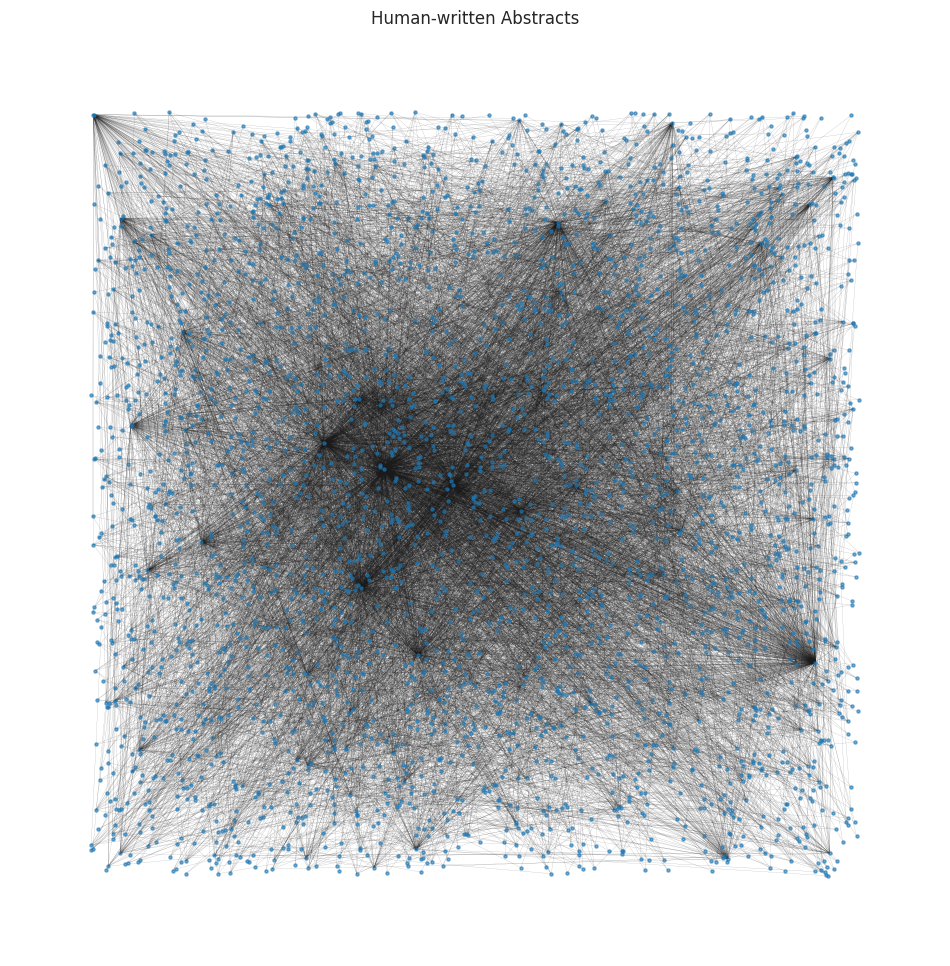

In [83]:
import json

with open(SAMPLE_FILE, 'r') as f:
    files = json.load(f)['ids']
    
    # read the first file in the list
    file_text = ''
    for file in files:
        for tag in TAGS[:1]:
            # print(tag + ' - ' + str(file))
            
            with open(get_file_name(file, tag), 'r') as f:
                file_text += f.read()
    sentences = extract_sentences(file_text)
    print(f"Number of Sentences: {len(sentences)}")
    words_list = extract_words(sentences[:580000])
    total_words = sum([len(words) for words in words_list])
    print(f"Number of Words: {total_words}")
    graph = []
    bigram_freq = constructEdgeList(words_list)
    for bigram in bigram_freq:   
        graph.append((*bigram[0], bigram[1]))    
    Gg, _ = constructGraph(graph)
    nk.overview(Gg)
    plt.figure(1, figsize=(12,12))
    plt.title('Human-written Abstracts')
    nx.draw_random(_, with_labels=False, node_size=5, font_size=6, width=.1, alpha=.6)
    plt.savefig('Human-written Abstracts.png')
    plt.show()

Number of Sentences: 538
Number of Words: 13399
Network Properties:
nodes, edges			2051, 7183
directed?			False
weighted?			True
isolated nodes			0
self-loops			1
density				0.003416
min/max/avg degree		1, 579, 7.003901
degree assortativity		-0.017615
number of connected components	1
size of largest component	2051 (100.00 %)


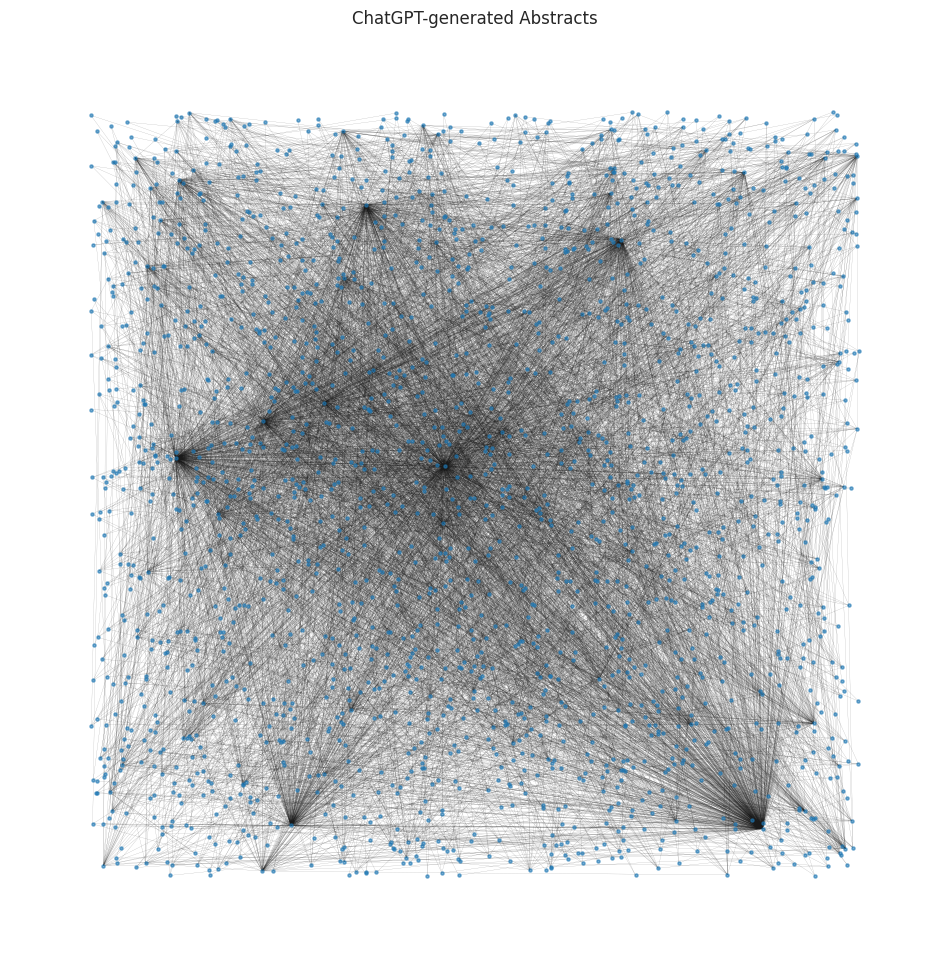

In [82]:
import json

with open(SAMPLE_FILE, 'r') as f:
    files = json.load(f)['ids']
    
    # read the first file in the list
    file_text = ''
    for file in files:
        for tag in TAGS[1:]:
            # print(tag + ' - ' + str(file))
            
            with open(get_file_name(file, tag), 'r') as f:
                file_text += f.read()
    sentences = extract_sentences(file_text)
    print(f"Number of Sentences: {len(sentences)}")
    words_list = extract_words(sentences[:580000])
    total_words = sum([len(words) for words in words_list])
    print(f"Number of Words: {total_words}")
    graph = []
    bigram_freq = constructEdgeList(words_list)
    for bigram in bigram_freq:   
        graph.append((*bigram[0], bigram[1]))    
    Gg, _ = constructGraph(graph)
    nk.overview(Gg)
    plt.figure(1, figsize=(12,12))
    plt.title('ChatGPT-generated Abstracts')
    nx.draw_random(_, with_labels=False, node_size=5, font_size=6, width=.1, alpha=.6)
    plt.savefig('ChatGPT-generated Abstracts.png')
    plt.show()